# 0. 라이브러리 및 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 1. EDA 실행

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

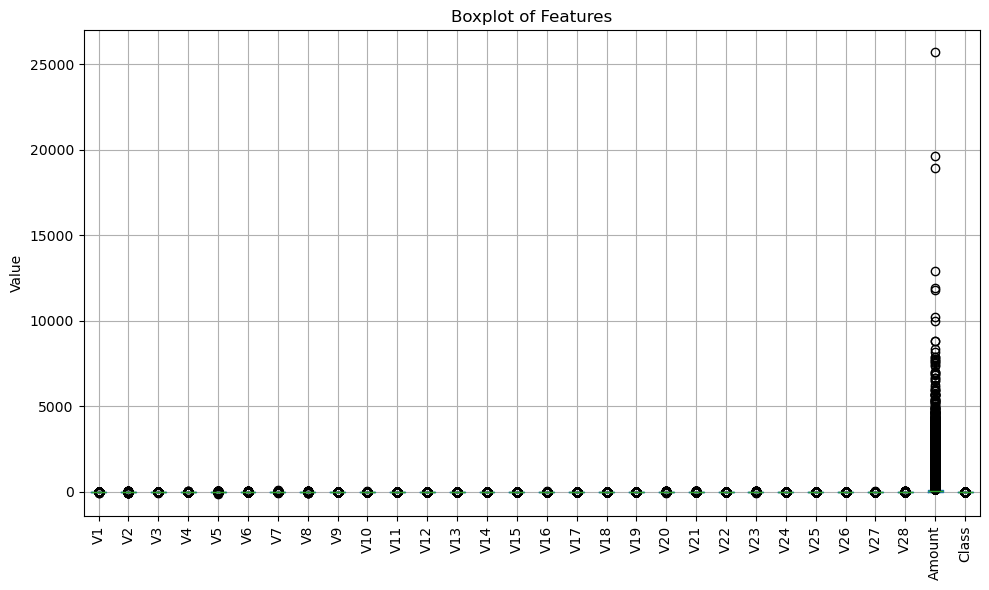

In [24]:
# 1. 데이터의 기본 정보
print(df.info())
print("--------------------")

# 2. 결측치 확인
print(df.isnull().sum())
print("--------------------")

# 3. 데이터의 통계적 요약
print(df.describe())
print("--------------------")

# 4. 데이터의 분포 시각화
plt.figure(figsize=(10, 6))
df.drop('Time', axis = 1).boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

### 전처리
    1. 수치 데이터 변형
    2. 결측치 제거
    3. 모델 간의 중요도 판별 -> 정규화

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


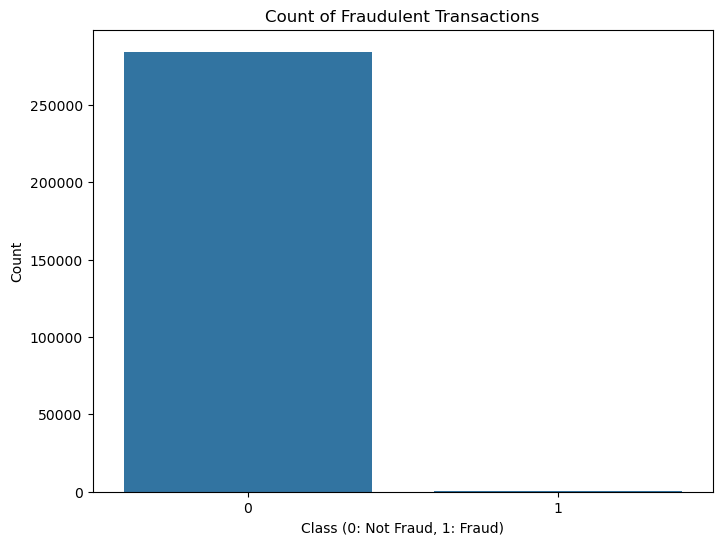

In [26]:
print(df['Class'].value_counts(normalize=True))

plt.figure(figsize=(8, 6))
sns.countplot(x = 'Class', data = df)
plt.title("Count of Fraudulent Transactions")
plt.xlabel("Class (0: Not Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.show()

모델은 0만 출력해도 성능이 99.9%

따라서 1에 대한 0.1%를 잘 맞추는지를 평가해야 한다. -> Recall

In [11]:
X = df.iloc[:, 1:-2] # 마지막 column 제외 : data / time 제외
y = df.iloc[:, -1] # 마지막 column : target

In [12]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

print(f"Accuracy  : {accuracy_score(y_test, y_pred) * 100} %")
print(f"Precision : {precision_score(y_test, y_pred) * 100} %")
print(f"Recall    : {recall_score(y_test, y_pred) * 100} %")
print(f"f1 score  : {f1_score(y_test, y_pred) * 100} %")
print(f"roc_curve : {roc_auc_score(y_test, y_pred) * 100} %")
print(f"log_loss  : {log_loss(y_test, y_pred)}")

Accuracy  : 99.95611109160492 %
Precision : 92.94117647058823 %
Recall    : 80.61224489795919 %
f1 score  : 86.33879781420765 %
roc_curve : 90.30084670334088 %
log_loss  : 0.015819166018186535
